In [5]:
1+2

3

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv("new_insurance_dataset.csv")

In [8]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [9]:
df.shape

(1338, 13)

### Data Sanity Checks

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

#### Missing Values

In [13]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [19]:
(df.isnull().sum()/df.shape[0])*100

age                                0.672646
sex                                0.000000
bmi                                0.224215
children                           0.373692
smoker                             0.000000
Claim_Amount                       1.046338
past_consultations                 0.448430
num_of_steps                       0.224215
Hospital_expenditure               0.298954
NUmber_of_past_hospitalizations    0.149477
Anual_Salary                       0.448430
region                             0.000000
charges                            0.000000
dtype: float64

#### Duplicates

In [21]:
df.duplicated().sum()

np.int64(0)

#### Garbage Values

In [24]:
# In Objects (ex: *, spl char)
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


#### EDA

In [26]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1329.0,3.931001e+01,1.403482e+01,1.800000e+01,2.700000e+01,3.900000e+01,5.100000e+01,6.400000e+01
bmi,1335.0,3.066511e+01,6.101690e+00,1.596000e+01,2.630250e+01,3.040000e+01,3.468750e+01,5.313000e+01
children,1333.0,1.090773e+00,1.201856e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Claim_Amount,1324.0,3.336133e+04,1.561729e+04,1.920136e+03,2.076886e+04,3.370031e+04,4.505233e+04,7.727799e+04
past_consultations,1332.0,1.521622e+01,7.467723e+00,1.000000e+00,9.000000e+00,1.500000e+01,2.000000e+01,4.000000e+01
num_of_steps,1335.0,9.100047e+05,9.188612e+04,6.954300e+05,8.471995e+05,9.143000e+05,9.716840e+05,1.107872e+06
Hospital_expenditure,1334.0,1.584179e+07,2.669305e+07,2.945253e+04,4.077633e+06,7.490337e+06,1.084082e+07,2.616317e+08
NUmber_of_past_hospitalizations,1336.0,1.060629e+00,5.335831e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
Anual_Salary,1332.0,3.696849e+08,5.668843e+08,2.747072e+06,7.701932e+07,1.419361e+08,3.243499e+08,4.117197e+09
charges,1338.0,1.327042e+04,1.211001e+04,1.121874e+03,4.740287e+03,9.382033e+03,1.663991e+04,6.377043e+04


In [27]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [31]:
# # Distibution
# for i in df.select_dtypes(include='number').columns:
#     sns.histplot(data=df,x=i)
#     plt.show()



In [32]:
# # Outliers
# for i in df.select_dtypes(include='number').columns:
#     sns.boxplot(data=df,x=i)
#     plt.show()

In [39]:
# Relationship between X and Y
x_num = df.select_dtypes(include="number").columns.to_list()
x_num.remove('charges')
x_num

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [42]:
# for i in x_num:
#     sns.scatterplot(data=df,x=i,y='charges')
#     plt.show()

<Figure size 200x200 with 0 Axes>

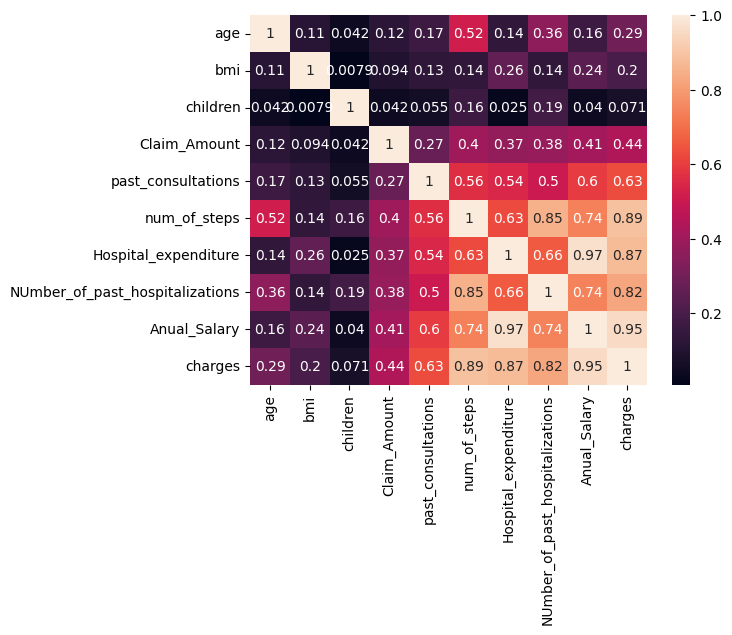

<Figure size 200x200 with 0 Axes>

In [49]:
s=df.select_dtypes(include="number").corr()
sns.heatmap(s, annot = True)
plt.figure(figsize=(2,2))